# PHQ615 : Calculs 

## Calcul de la connexion affine et du tenseur de Riemann à partir de la métrique

## Coordonnées polaires sur le plan euclidien

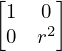

In [1]:
from sympy import *
from sympy import Array

init_printing()

r, θ = symbols('r θ')
gd = Array([[1, 0],[0, r**2]])
coords = Array([r, θ])
gu = Array([[1, 0],[0, 1/(r**2)]])
gd

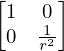

In [2]:
gu

In [3]:
tensorcontraction(tensorproduct(gd, gu), (1,2))

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

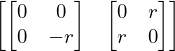

In [3]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
simplify(gammad)

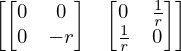

In [4]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
simplify(Γ)

## Calcul du tenseur de Riemann

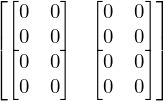

In [5]:
# tenseur de Riemann
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0)) + permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

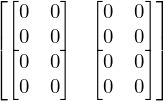

In [6]:
# tenseur de Riemann covariant
Rcov =  tensorcontraction(tensorproduct(gd, R), (1,2))
Rcov

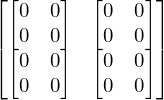

In [7]:
# vérification des propriétés de symétrie de Rcov
A = Rcov + permutedims(Rcov,(0,2,3,1)) + permutedims(Rcov,(0,3,1,2))
simplify(A)